In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/superstore.csv")
df.head()


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


## 1. Dataset Overview
This section provides a basic understanding of the dataset structure, size, and columns.


In [4]:
# Number of rows and columns
print(f"Dataset Shape: {df.shape}")

# List of columns
df.columns


Dataset Shape: (51290, 27)


Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

## 2. Data Types and Missing Values
This section checks data types of each column and identifies missing values.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [7]:
# Number of duplicate rows
df.duplicated().sum()




np.int64(0)

In [8]:
# Statistical summary of numerical columns
df.describe()


,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


## 3. Column Review and Initial Decisions
This section reviews all columns and identifies which are relevant for analysis.


In [9]:
# Display all column names clearly
for col in df.columns:
    print(col)


Category
City
Country
Customer.ID
Customer.Name
Discount
Market
记录数
Order.Date
Order.ID
Order.Priority
Product.ID
Product.Name
Profit
Quantity
Region
Row.ID
Sales
Segment
Ship.Date
Ship.Mode
Shipping.Cost
State
Sub.Category
Year
Market2
weeknum


## 4. Column Selection
Dropping columns that do not add analytical value.


In [10]:

cols_to_drop = [
    "记录数",
    "Row.ID",
    "Customer.Name",
    "Product.Name",
    "Market2"
]

df_clean = df.drop(columns=cols_to_drop)
df_clean.shape


(51290, 22)

## 5. Column Renaming
Renaming columns for consistency and readability.


In [11]:
# Renaming the columns for consistency
df_clean = df_clean.rename(columns={
    "Customer.ID": "customer_id",
    "Order.ID": "order_id",
    "Order.Date": "order_date",
    "Ship.Date": "ship_date",
    "Order.Priority": "order_priority",
    "Ship.Mode": "ship_mode",
    "Product.ID": "product_id",
    "Sub.Category": "sub_category",
    "Shipping.Cost": "shipping_cost"
})

df_clean.columns


Index(['Category', 'City', 'Country', 'customer_id', 'Discount', 'Market',
       'order_date', 'order_id', 'order_priority', 'product_id', 'Profit',
       'Quantity', 'Region', 'Sales', 'Segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'State', 'sub_category', 'Year', 'weeknum'],
      dtype='object')

## 6. Data Type Conversion
Converting date columns to datetime format for time-based analysis.


In [13]:

df_clean["order_date"] = pd.to_datetime(df_clean["order_date"])
df_clean["ship_date"] = pd.to_datetime(df_clean["ship_date"])

df_clean[["order_date", "ship_date"]].dtypes


order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

## 7. Feature Engineering
Creating delivery time feature.



In [14]:
# Delivery time in days
df_clean["delivery_days"] = (df_clean["ship_date"] - df_clean["order_date"]).dt.days

df_clean["delivery_days"].describe()


count    51290.000000
mean         3.969370
std          1.729437
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: delivery_days, dtype: float64

In [15]:
# Time-based features
df_clean["order_month"] = df_clean["order_date"].dt.month
df_clean["order_year"] = df_clean["order_date"].dt.year
df_clean["order_quarter"] = df_clean["order_date"].dt.to_period("Q").astype(str)

df_clean[["order_month", "order_year", "order_quarter"]].head()



,order_month,order_year,order_quarter
0,1,2011,2011Q1
1,1,2011,2011Q1
2,8,2011,2011Q3
3,8,2011,2011Q3
4,9,2011,2011Q3


## 8. Data Validation Checks
Ensuring no invalid values exist after transformations.


In [17]:
# Check for negative delivery days
df_clean[df_clean["delivery_days"] < 0].shape


(0, 26)

## 9. Sales and Profit Overview
Analyzing overall sales and profit performance.


In [22]:

total_sales = df_clean["Sales"].sum()
total_profit = df_clean["Profit"].sum()

total_sales, total_profit


(np.int64(12642905), np.float64(1467457.2912800002))

## 10. Sales and Profit Trend Over Time
Understanding how sales and profit evolve over time.


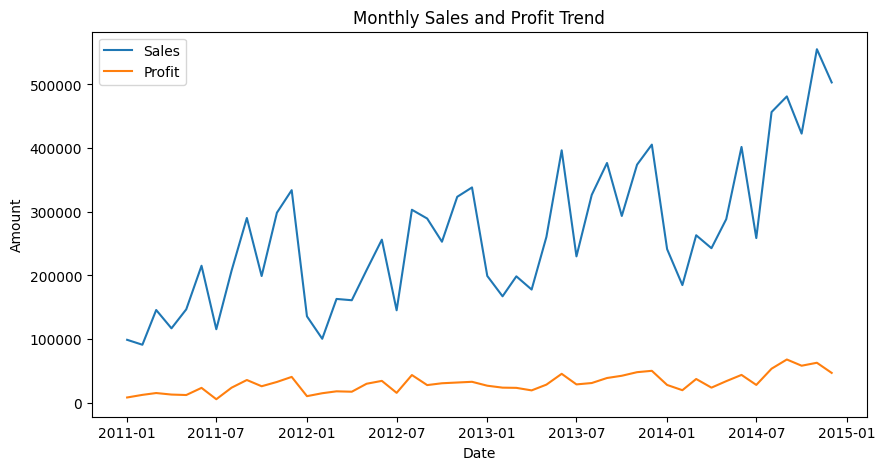

In [29]:
import matplotlib.pyplot as plt

# Aggregate monthly sales & profit
monthly_trend = (
    df_clean
    .groupby(["order_year", "order_month"])
    .agg({"Sales": "sum", "Profit": "sum"})
    .reset_index()
)

# Create a datetime column for plotting
monthly_trend["date"] = pd.to_datetime(
    monthly_trend["order_year"].astype(str) + "-" +
    monthly_trend["order_month"].astype(str) + "-01"
)

plt.figure(figsize=(10,5))
plt.plot(monthly_trend["date"], monthly_trend["Sales"], label="Sales")
plt.plot(monthly_trend["date"], monthly_trend["Profit"], label="Profit")
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()


In [33]:
# Category wise sales and profit
category_sales_profit = (
    df_clean
    .groupby("Category")
    .agg(
        Total_Sales=("Sales", "sum"),
        Total_Profit=("Profit", "sum")
    )
    .sort_values(by="Total_Sales", ascending=False)
)

category_sales_profit


,Total_Sales,Total_Profit
Category,,
Technology,4744691,663778.73318
Furniture,4110884,285204.72380
Office Supplies,3787330,518473.83430


In [34]:
#Sub-Category Performance (Sales vs Profit)
subcat_sales_profit = (
    df_clean
    .groupby("sub_category")
    .agg(
        Total_Sales=("Sales", "sum"),
        Total_Profit=("Profit", "sum")
    )
    .sort_values(by="Total_Sales", ascending=False)
)

subcat_sales_profit.head(10)


,Total_Sales,Total_Profit
sub_category,,
Phones,1706874,216717.00580
Copiers,1509439,258567.54818
Chairs,1501682,140396.26750
Bookcases,1466559,161924.41950
Storage,1127124,108461.48980
Appliances,1011081,141680.58940
Machines,779071,58867.87300
Tables,757034,-64083.38870
Accessories,749307,129626.30620


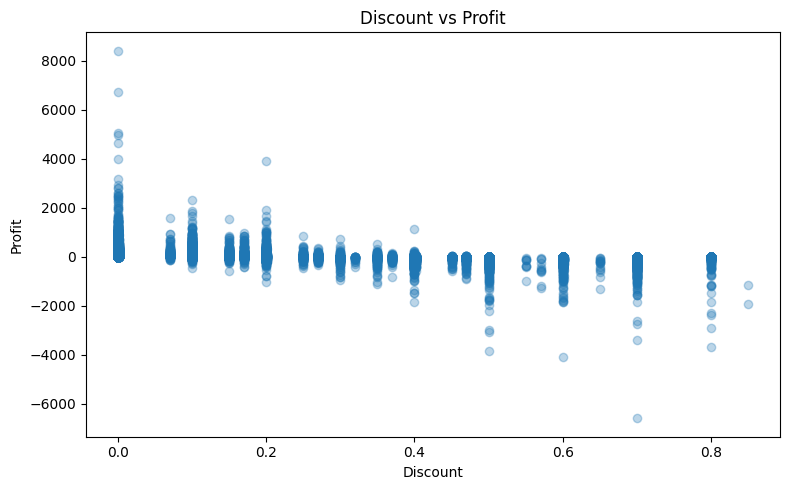

In [38]:
# Discount Impact on Profit
plt.figure(figsize=(8,5))
plt.scatter(df_clean["Discount"], df_clean["Profit"], alpha=0.3)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


In [42]:
import numpy as np

# Safe Profit Margin calculation (avoid division by zero)
df_clean["Profit_Margin"] = np.where(
    df_clean["Sales"] > 0,
    df_clean["Profit"] / df_clean["Sales"],
    np.nan
)

df_clean["Profit_Margin"].describe()


count    51289.000000
mean         0.047200
std          0.466849
min         -4.727752
25%          0.000000
50%          0.169254
75%          0.333112
max          0.582800
Name: Profit_Margin, dtype: float64

### Note on Profit Margin Calculation
Profit Margin is calculated only for records with positive Sales values.  
Rows with zero Sales are assigned NaN to avoid infinite or invalid values.


### Key Sales & Profit Insights
- Sales show clear seasonal trends across years.
- Profit is more volatile than Sales, indicating discount and cost sensitivity.
- Some sub-categories achieve high Sales but generate low or negative Profit.
- Higher discounts generally reduce Profit margins.
